# Assignment 4
# Cezar Budeci, Samantha Bergdahl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import kruskal

In [2]:
df = pd.read_csv('data1_eng.csv', sep = ';', decimal = ',')

In [3]:
df

,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare_work          47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [6]:
df.isnull().any().any()

True

<AxesSubplot:>

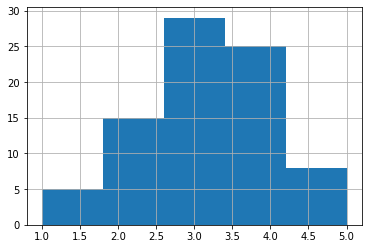

In [7]:
df['sat_tasks'].hist(bins=5)

<AxesSubplot:>

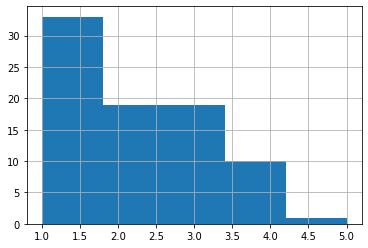

In [8]:
df['sat_salary'].hist(bins=5)

<AxesSubplot:>

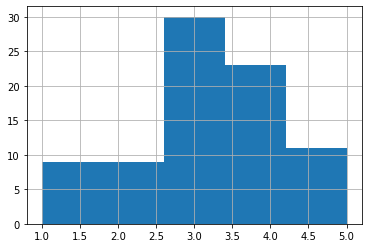

In [9]:
df['sat_workingEnvironment'].hist(bins=5)

In [10]:
def significance(p):
    if p >= 0.05:
        return 'Not significant'
    if 0.01 < p < 0.05:
        return 'Significant'
    if 0.001 < p < 0.01:
        return 'Very significant'
    if 0.0001 < p < 0.001:
        return 'Extremely significant'
    return 'Extremely significant'

In [11]:
g1_task_fam = df['sat_tasks'][df['family'] == 1]
g2_task_fam = df['sat_tasks'][df['family'] == 2]
g1_ssal_fam = df['sat_salary'][df['family'] == 1]
g2_ssal_fam = df['sat_salary'][df['family'] == 2]
g1_env_fam = df['sat_workingEnvironment'][df['family'] == 1]
g2_env_fam = df['sat_workingEnvironment'][df['family'] == 2]

# T-test

In [12]:
pd.crosstab(df['family'], 'Count')

col_0,Count
family,
1,31
2,51


In [13]:
df[['family', 'sat_tasks', 'sat_workingEnvironment', 'sat_salary']].describe()

,family,sat_tasks,sat_workingEnvironment,sat_salary
count,82.000000,82.000000,82.000000,82.000000
mean,1.621951,3.195122,3.219512,2.109756
std,0.487884,1.047502,1.154961,1.111179
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,1.000000
50%,2.000000,3.000000,3.000000,2.000000
75%,2.000000,4.000000,4.000000,3.000000
max,2.000000,5.000000,5.000000,5.000000


In [14]:
df.groupby('family')['sat_tasks'].describe()[['mean', 'std', 'count']]

,mean,std,count
family,,,
1,2.774194,1.023383,31.0
2,3.450980,0.986179,51.0


### Hypotesis for test (alpha < 0.05):
#### H0: There is no difference between satisfaction of tasks and family
#### H1: There is a difference between satisfaction of tasks and family

In [15]:
result = ttest_ind(g1_task_fam, g2_task_fam, equal_var = False)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

Ttest_indResult(statistic=-2.9438361240526967, pvalue=0.00456575270083115)
Significance: Very significant


#### H1 has been proven

### Hypotesis for test (alpha < 0.05):
#### H0: There is no difference between satisfaction of working environment and family
#### H1: There is a difference between satisfaction of working environment and family

In [16]:
result = ttest_ind(g1_env_fam, g2_env_fam, equal_var = False)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

Ttest_indResult(statistic=-2.678719258682128, pvalue=0.00924822243998242)
Significance: Very significant


#### H1 has been proven

# Mann-Whitney

### Hypotesis for test (alpha < 0.05):
#### H0: There is no difference between satisfaction of tasks and family
#### H1: There is a difference between satisfaction of tasks and family

In [17]:
result = mannwhitneyu(g1_task_fam, g2_task_fam)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

MannwhitneyuResult(statistic=490.0, pvalue=0.002785138239756764)
Significance: Very significant


#### H1 has been proven

### Hypotesis for test (alpha < 0.05):
#### H0: There is no difference between satisfaction of salary and  family
#### H1: There is a difference between satisfaction of salary and  family

In [18]:
result = mannwhitneyu(g1_ssal_fam, g2_ssal_fam)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

MannwhitneyuResult(statistic=590.5, pvalue=0.045305086028124206)
Significance: Significant


#### H1 has been proven

### Hypotesis for test (alpha < 0.05):
#### H0: There is no difference between satisfaction of working environment and family
#### H1: There is a difference between satisfaction of working environment and family

In [19]:
result = mannwhitneyu(g1_env_fam, g2_env_fam)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

MannwhitneyuResult(statistic=524.5, pvalue=0.008260881998509148)
Significance: Very significant


#### H1 has been proven

# F-test

In [20]:
bins = [x for x in range(15, 66, 10)]
df['age_class'] = pd.cut(df['age'], bins = bins)
df['age_class'] = df['age_class'].astype(str)
df.loc[(df.age_class == '(15, 25]'),'age_class']=1
df.loc[(df.age_class == '(25, 35]'),'age_class']=2
df.loc[(df.age_class == '(35, 45]'),'age_class']=3
df.loc[(df.age_class == '(45, 55]'),'age_class']=4
df.loc[(df.age_class == '(55, 65]'),'age_class']=5
df.head()

,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare,age_class
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,3
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,2
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,2
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,3
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,1


In [21]:
df[['education', 'age']].describe()

,education,age
count,81.000000,82.000000
mean,1.987654,37.951220
std,0.844006,9.773866
min,1.000000,20.000000
25%,1.000000,31.000000
50%,2.000000,37.500000
75%,3.000000,44.000000
max,4.000000,61.000000


### Education and salary satisfaction

In [22]:
df.groupby('education')['sat_salary'].std()

education
1.0    1.001423
2.0    1.066200
3.0    1.223861
4.0    1.414214
Name: sat_salary, dtype: float64

In [23]:
df.groupby('education')['sat_salary'].mean()

education
1.0    1.814815
2.0    2.033333
3.0    2.454545
4.0    3.000000
Name: sat_salary, dtype: float64

education
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sat_salary, dtype: object

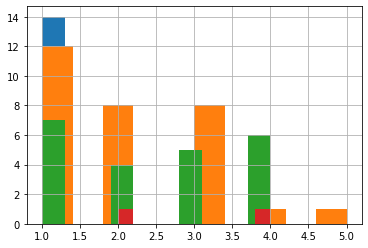

In [24]:
df.groupby('education')['sat_salary'].hist()

### Hypotesis for test (alpha = 0.05):
#### H0: There is no difference between salary satisfaction and education
#### H1: There is a difference between salary satisfaction and education

In [25]:
s1_ed_ssal = df['sat_salary'][df['education'] == 1]
s2_ed_ssal = df['sat_salary'][df['education'] == 2]
s3_ed_ssal = df['sat_salary'][df['education'] == 3]
s4_ed_ssal = df['sat_salary'][df['education'] == 4]

result = f_oneway(s1_ed_ssal, s2_ed_ssal, s3_ed_ssal, s4_ed_ssal)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

F_onewayResult(statistic=1.8632425429714214, pvalue=0.142836730615458)
Significance: Not significant


#### H0 has been proven

### Age class and woking environment satisfaction

In [26]:
df.groupby('age_class')['sat_workingEnvironment'].std()

age_class
1    0.690066
2    1.100745
3    1.350428
4    0.924416
5    1.303840
Name: sat_workingEnvironment, dtype: float64

In [27]:
df.groupby('age_class')['sat_workingEnvironment'].mean()

age_class
1    3.142857
2    3.214286
3    3.096774
4    3.363636
5    3.800000
Name: sat_workingEnvironment, dtype: float64

age_class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sat_workingEnvironment, dtype: object

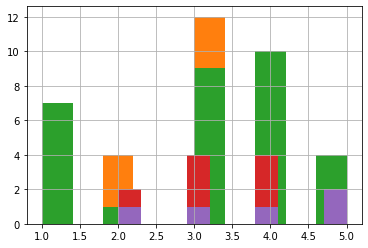

In [28]:
df.groupby('age_class')['sat_workingEnvironment'].hist()

### Hypotesis for test (alpha = 0.05):
#### H0: There is no difference between environment satisfaction and ages
#### H1: There is a difference between environment satisfaction and ages

In [29]:
s1_age_env = df['sat_workingEnvironment'][df['age_class'] == 1]
s2_age_env = df['sat_workingEnvironment'][df['age_class'] == 2]
s3_age_env = df['sat_workingEnvironment'][df['age_class'] == 3]
s4_age_env = df['sat_workingEnvironment'][df['age_class'] == 4]
s5_age_env = df['sat_workingEnvironment'][df['age_class'] == 5]

result = f_oneway(s1_age_env, s2_age_env, s3_age_env, s4_age_env, s5_age_env)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

F_onewayResult(statistic=0.4414394810447926, pvalue=0.7782765060902492)
Significance: Not significant


#### H0 has been proven

# Kruskal-Wallis

### Education and salary satisfaction

### Hypotesis for test (alpha = 0.05):
#### H0: There is no difference between salary satisfaction and education
#### H1: There is a difference between salary satisfaction and education

In [30]:
result = kruskal(s1_ed_ssal, s2_ed_ssal, s3_ed_ssal, s4_ed_ssal)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

KruskalResult(statistic=5.142181027563702, pvalue=0.16167713512286364)
Significance: Not significant


#### H0 has been proven

### Age class and woking environment satisfaction

### Hypotesis for test (alpha = 0.05):
#### H0: There is no difference between environment satisfaction and ages
#### H1: There is a difference between environment satisfaction and ages

In [31]:
result = kruskal(s1_age_env, s2_age_env, s3_age_env, s4_age_env, s5_age_env)
print(result)
print('Significance: {}'.format(significance(result.pvalue)))

KruskalResult(statistic=1.4329265313180195, pvalue=0.8384525129169303)
Significance: Not significant


#### H0 has been proven